### Importamos librerías a usar

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import missingno as msno

### Abrimos los archivos y realizamos un análisis exploratorio de datos

In [107]:
# Archivo de estaciones de bicicletas
data=pd.read_csv(r'C:\Users\Alfredo\Desktop\Microstrategy\Datasets\Estaciones-bicicletas.csv')
# Archivo de recorridos de bicicletas
data_recorridos=pd.read_csv(r'C:\Users\Alfredo\Desktop\Microstrategy\Datasets\Recorrido de bicicletas 2015-2019 original.csv')

### Primeras filas de dataset estaciones de bicicletas

In [108]:
data.head(3)

,lat,long,nombre_estacion,id_estacion,capacidad,dirección_completa,direccion_nombre,direccion_altura,direccion_interseccion,barrio
0,-34.59242329999999,-58.374715,002 - Retiro I,2,20.0,"Ramos Mejia, Jose Maria, Dr. Av. y Del Liberta...","Ramos Mejia, Jose Maria, Dr. Av.",NaN,Del Libertador Av.,Retiro
1,-34.611032,-58.368260,003 - ADUANA,3,20.0,Moreno y Paseo Colon Av.,Moreno,NaN,Paseo Colon Av.,Monserrat
2,-34.6017255,-58.368763,004 - Plaza Roma,4,20.0,Lavalle y Bouchard,Lavalle,NaN,Bouchard,San Nicolas


### Forma del dataset estaciones de bicicletas

In [109]:
print('Filas--Columnas')
data.shape

Filas--Columnas


(396, 10)

### Se muestran los valores faltantes de cada columna de "estaciones bicicletas"

In [110]:
print("¿Cuántos valores faltantes hay en cada columna?")
data.isna().sum()

¿Cuántos valores faltantes hay en cada columna?


lat                         0
long                        0
nombre_estacion             0
id_estacion                 0
capacidad                   0
dirección_completa          8
direccion_nombre            4
direccion_altura          122
direccion_interseccion    221
barrio                      0
dtype: int64

### Forma del dataset

In [113]:
data.shape

(396, 10)

### Tipos de datos de cada atributo - Estaciones bicicletas

In [114]:
## Información del set de datos de estaciones de bicicletas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lat                     396 non-null    object 
 1   long                    396 non-null    float64
 2   nombre_estacion         396 non-null    object 
 3   id_estacion             396 non-null    int64  
 4   capacidad               396 non-null    float64
 5   dirección_completa      388 non-null    object 
 6   direccion_nombre        392 non-null    object 
 7   direccion_altura        274 non-null    float64
 8   direccion_interseccion  175 non-null    object 
 9   barrio                  396 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 31.1+ KB


### Vamos a mostrar la geometría de los valores faltantes y como se relacionan entre ellos.
* Todos los espacios en blanco son los valores faltantes.

<AxesSubplot:>

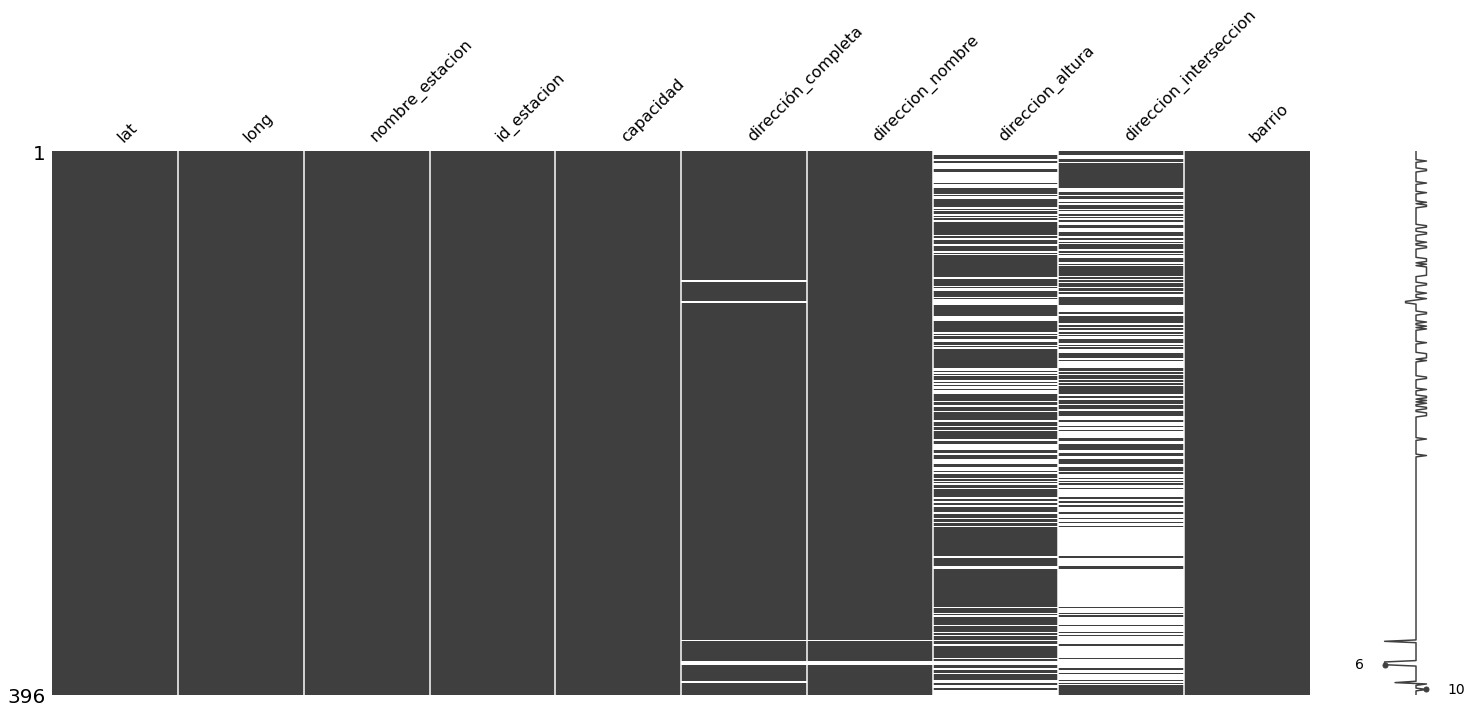

In [115]:
msno.matrix(data)

In [116]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valores faltantes', 1 : '% de Valores Totales'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% de Valores Totales', ascending=False).round(1)
        
        # Print some summary information
        print ("El dataframe seleccionado tiene " + str(df.shape[1]) + " columnas.\n"      
            "Hay " + str(mis_val_table_ren_columns.shape[0]) +
              " columnas que tienen valores faltanes.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [117]:
missing_values_table(data)

El dataframe seleccionado tiene 10 columnas.
Hay 4 columnas que tienen valores faltanes.


,Valores faltantes,% de Valores Totales
direccion_interseccion,221,55.8
direccion_altura,122,30.8
dirección_completa,8,2.0
direccion_nombre,4,1.0


### Matriz de barras: muestra la cantidad de valores que tiene cada columna.
* Las barras llenas, indican la totalidad de datos por columna.
* Las barras que no llegan a la cima, es porque presentan valores faltantes en el dataset.

<AxesSubplot:>

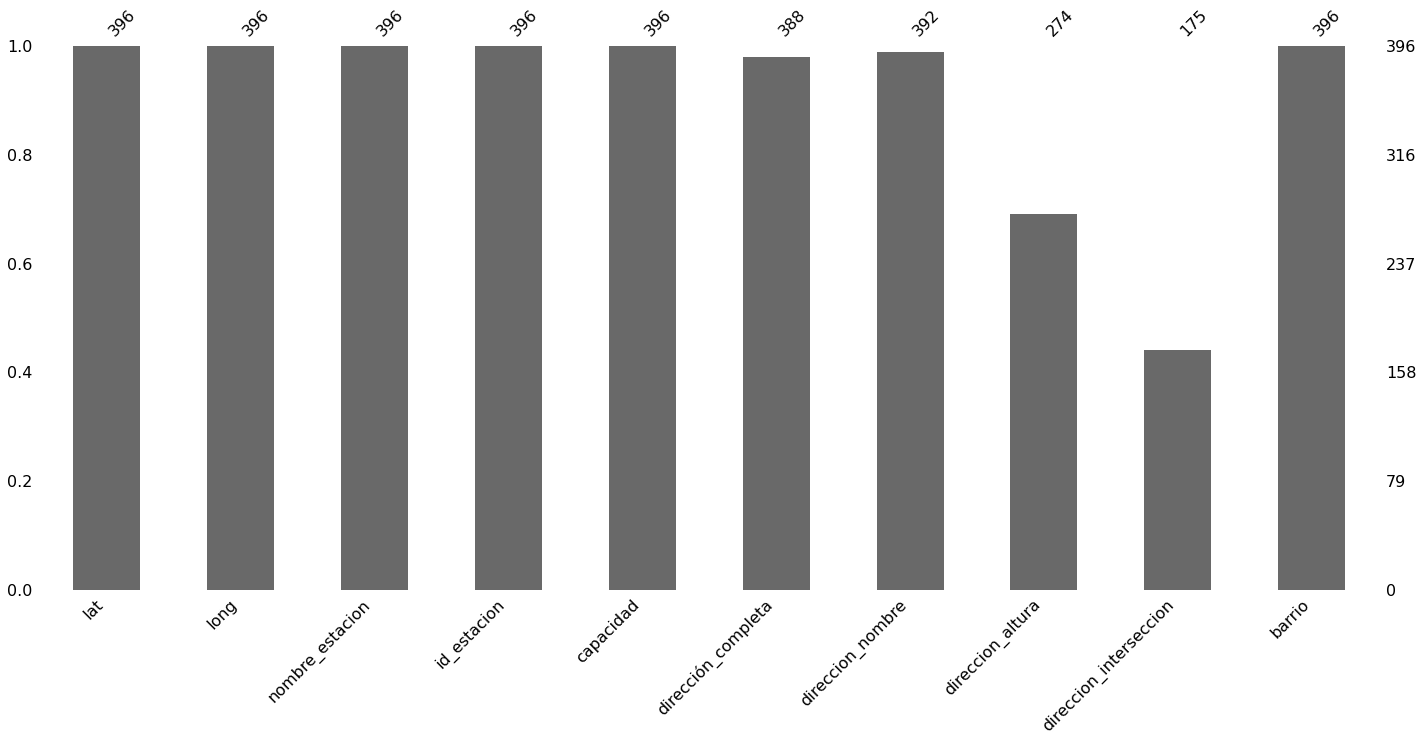

In [118]:
msno.bar(data)

### Se va a imprimir la distribución de los faltantes de cada una de las columnas previamente mencionadas.
### Se ordena por  "dirección_completa", para ver alguna semejanza en los faltantes con el resto de las columnas.

<AxesSubplot:>

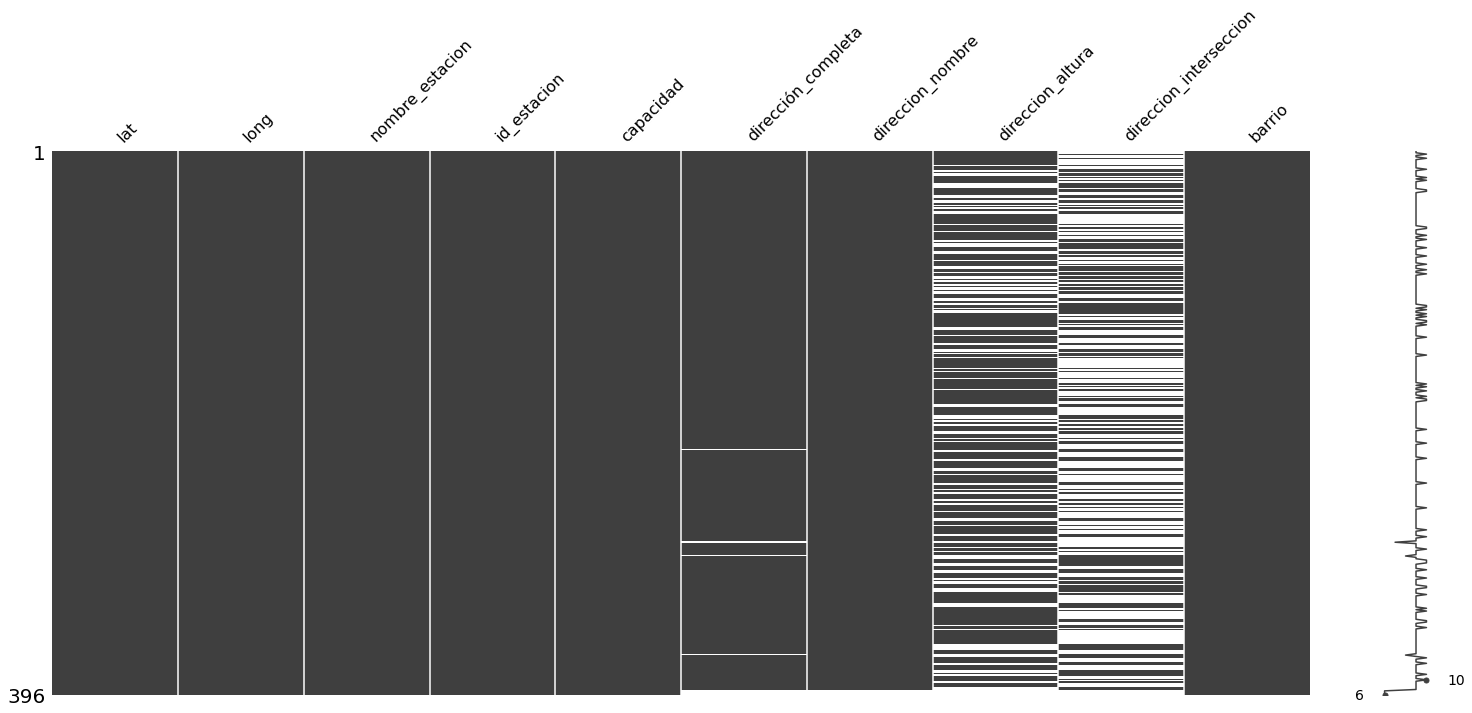

In [119]:
ordenado_nom = data.sort_values('direccion_nombre')
msno.matrix(ordenado_nom)

* A partir del gráfico anterior se ve que coinciden los datos faltantes de dirección_nombre con direccion_completa.
* También se puede observar que hay valores de dirección_completa que faltan al azar. No tienen una correlación directa con otro atributo.

<AxesSubplot:>

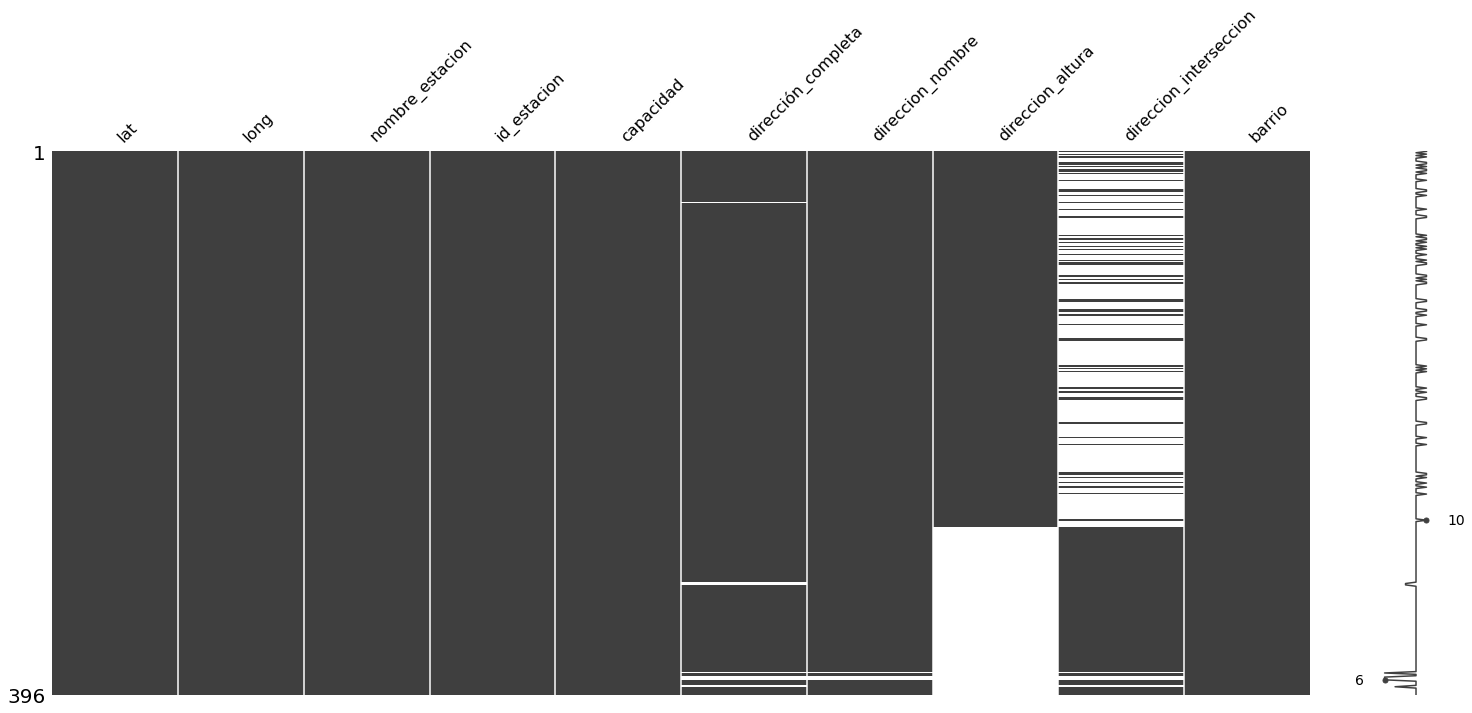

In [120]:
ordenado_altura = data.sort_values('direccion_altura')
msno.matrix(ordenado_altura)

* Luego de ver el ploteo anterior, se puede deducir que la relación de valores faltantes entre direccion_altura y direccion_interseccion es inversamente proporcional. Esto se da, porque la mayoría de las veces que falta el dato de la altura de la dirección, es porque se encuentra el dato de la intersección de las calles. Entonces la altura pasa a ser un valor redundante en la base de datos.
* Como comentario entonces, se puede afirmar que no hay que preocuparse por esos valores faltantes de la altura de la calle.

### Mapa de correlación de valores faltantes
#### MNAR (missing not at random) y MAR (missing at random).
* Con este mapa de correlación podemos confirmar la hipótesis planteada anteriormente de los valores faltantes de cada columna de la siguiente manera:
* Los valores faltantes de la columna direccion_nombre tiene una correlación significativa positiva con los valores faltantes de la columna direccion_completa. Son MNAR
* Los valores faltantes de la columna direccion_interseccion tiene una correlacion inversamente significativa con los valores de la columna direccion_altura. Esto significa que cada vez que a una columna le falte un dato, es altamente probable que la otra columna lo tenga. Son MNAR ¿ Para que sirve saber esto ? Supongamos que queremos sanar nuestra base de datos y no sabemos como empezar. Pero si sabemos que los datos faltantes de estas dos columnas mencionadas se correlacionan inversamente, podremos buscar información en otro lado, en el hipotético caso de que se pueda.
* Se puede observar a raíz del gráfico anterior y confirmando con el siguiente mapa de correlación que los pocos datos faltantes de la columna direccion_nombre, se correlacionan en un 10 % con datos faltantes de la columna direccion_interseccion y con direccion altura. Son MNAR
* Direccion_altura y dirección_completa, tienen una correlacion de valores faltantes del 20%. Son MNAR.

<AxesSubplot:>

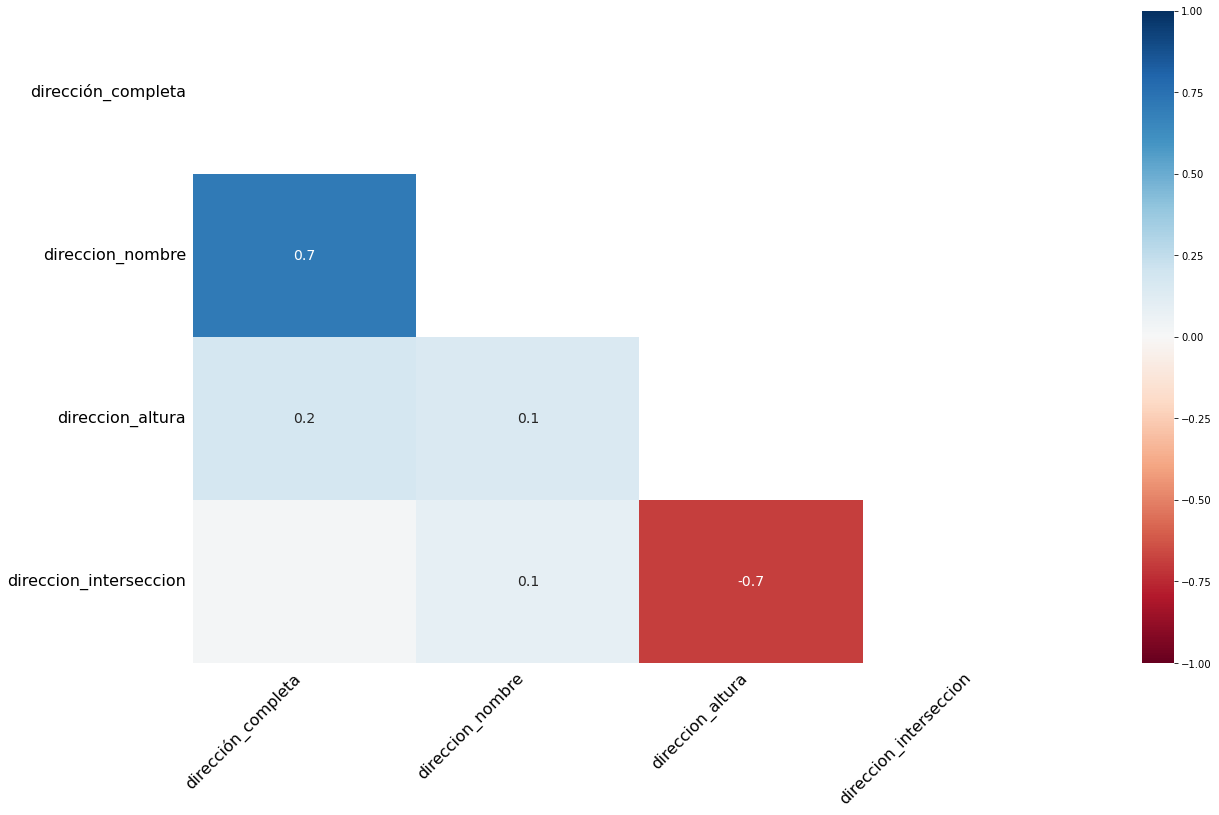

In [121]:
msno.heatmap(data)

### El formato de dato de latitud y longitud no son iguales.

* Se observa en la información otorgada por pandas, que "lat" y "long", no coinciden con el tipo de formato de dato. Por lo que se procede a cambiar el formato de "lat" a tipo (float64), ya que no puede ser un "object", osea un objeto, porque estamos hablando de un número, un valor de coordenada.

    En Python, el tipo de datos de texto se conoce como secuencia de caracteres (string). En Pandas se los conoce como objetos (object). Entonces todos las columnas que sean numéricas y sean del tipo object, hay que corregirlas.

In [122]:
data["lat"] = data.lat.astype(float)

ValueError: could not convert string to float: '393 - Barrio 31'

* Se puede observar en el comando anterior que hay un error de valor "ValueError", que no puede convertir el valor "393 - Barrio 31", que claramente no es una coordenada de latitud. Esto significa que estamos en presencia de un dato en un lugar equivocado. Hay que corregirlo, la latitud debería ser un valor numérico.
* Comprobamos a continuación si en existe dicho valor:

In [123]:
print('Latitud:',data["lat"][391])
print('Longitud:',data['long'][391])
print('Nombre estacion:',data['nombre_estacion'][391])
print('Id_estacion:',data['id_estacion'][391])
print('Dirección completa:',data['dirección_completa'][391])

Latitud: 393 - Barrio 31
Longitud: -58.3787309
Nombre estacion: 393 - Barrio 31
Id_estacion: 448
Dirección completa: Carlos H. Perette 11


### Buscando en el archivo, se descubrió que está la dirección de la estación, y coincide con el Barrio 31. Entonces buscamos en google esa dirección:
[Dirección de maps](https://www.google.com/maps/place/Carlos+H.+Perette+11,+Buenos+Aires/@-34.5832497,-58.3798771,17z/data=!3m1!4b1!4m5!3m4!1s0x95bccaae9bca218b:0x331d7c6e9b2a79db!8m2!3d-34.5832497!4d-58.3776884), las coordenadas son Latitud:-34.58310835113378, Longitud: -58.37769913111885.
* Vamos a reemplazar "393 - Barrio 31", por -34.58310835113378

In [124]:
data["lat"][391]=-34.58310835113378
data.tail(5)

C:\Users\Alfredo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,lat,long,nombre_estacion,id_estacion,capacidad,dirección_completa,direccion_nombre,direccion_altura,direccion_interseccion,barrio
391,-34.583108,-58.378731,393 - Barrio 31,448,16.0,Carlos H. Perette 11,Carlos H. Perette,11.0,"Perette, Carlos H.",Retiro
392,-34.6074084,-58.395055,076 - Ayacucho,76,20.0,"Ayacucho y Peron, Juan Domingo, Tte. General",Ayacucho,NaN,"Peron, Juan Domingo, Tte. General",Balvanera
393,-34.598549,-58.397354,43 - Plaza Houssay,328,16.0,"Cordoba Av. y Uriburu Jose E., Pres.",Cordoba Av.,NaN,"Uriburu Jose E., Pres.",Recoleta
394,-34.6289374,-58.463661,San Jose de Flores,449,24.0,Avenida Rivadavia y Fray Cayetano,Avenida Rivadavia,NaN,Fray Cayetano,Flores
395,-34.613449,-58.423397,197 - Quintino Bocayuva,197,20.0,Quintino Bocayuva y Don Bosco,Quintino Bocayuva,NaN,Don Bosco,Almagro


### Buscamos valores Nan en "dirección_completas". Estaciones-origen

In [125]:
esnulo=[]
for i, item in enumerate(data['dirección_completa'].isnull()):
    if item==True:
        esnulo.append(i)
print(f'Hay {len(esnulo)} valores nulos y son en los indices:\n{esnulo}')

Hay 8 valores nulos y son en los indices:
[94, 109, 110, 356, 371, 372, 373, 386]


### Se imprimen los índices de las coordenadas de las direcciones completas faltantes

In [126]:
coordenadas=[]
for i,j in zip(data['lat'],data['long']):
    x=(i,j)
    coordenadas.append(x)
print('Indice 94:',coordenadas[94])
print('Indice 109:',coordenadas[109])
print('Indice 110:',coordenadas[110])
print('Indice 356:',coordenadas[356])
print('Indice 371:',coordenadas[371])
print('Indice 372:',coordenadas[372])
print('Indice 373:',coordenadas[373])
print('Indice 386:',coordenadas[386])

Indice 94: ('-34.605487700000005', -58.3646858)
Indice 109: ('-34.592105600000004', -58.3745419)
Indice 110: ('-34.59840429999999', -58.3990158)
Indice 356: ('-34.543949', -58.4408983)
Indice 371: ('-34.5440696', -58.4390434)
Indice 372: ('-34.5419013', -58.4438699)
Indice 373: ('-34.54098920000001', -58.4442786)
Indice 386: ('-34.5782972', -58.4450299)


### Comprobamos que los datos sean coincidentes: (otra manera de codearlo, para mostrar lo mismo)

In [127]:
print('Busco en google latitud: ',data['lat'][94],' y longitud: ',data['long'][94], 'Direccion completa: ',data['dirección_completa'][94])  
print('Busco en google latitud: ',data['lat'][109],' y longitud: ',data['long'][109],data['dirección_completa'][109], 'Direccion completa: ',data['dirección_completa'][109])
print('Busco en google latitud: ',data['lat'][110],' y longitud: ',data['long'][110],data['dirección_completa'][110], 'Direccion completa: ',data['dirección_completa'][110])
print('Busco en google latitud: ',data['lat'][356],' y longitud: ',data['long'][356],data['dirección_completa'][356], 'Direccion completa: ',data['dirección_completa'][356])
print('Busco en google latitud: ',data['lat'][371],' y longitud: ',data['long'][371],data['dirección_completa'][371], 'Direccion completa: ',data['dirección_completa'][371])
print('Busco en google latitud: ',data['lat'][372],' y longitud: ',data['long'][372],data['dirección_completa'][372], 'Direccion completa: ',data['dirección_completa'][372])
print('Busco en google latitud: ',data['lat'][373],' y longitud: ',data['long'][373],data['dirección_completa'][373], 'Direccion completa: ',data['dirección_completa'][373])
print('Busco en google latitud: ',data['lat'][386],' y longitud: ',data['long'][386],data['dirección_completa'][386], 'Direccion completa: ',data['dirección_completa'][386])

Busco en google latitud:  -34.605487700000005  y longitud:  -58.3646858 Direccion completa:  nan
Busco en google latitud:  -34.592105600000004  y longitud:  -58.3745419 nan Direccion completa:  nan
Busco en google latitud:  -34.59840429999999  y longitud:  -58.3990158 nan Direccion completa:  nan
Busco en google latitud:  -34.543949  y longitud:  -58.4408983 nan Direccion completa:  nan
Busco en google latitud:  -34.5440696  y longitud:  -58.4390434 nan Direccion completa:  nan
Busco en google latitud:  -34.5419013  y longitud:  -58.4438699 nan Direccion completa:  nan
Busco en google latitud:  -34.54098920000001  y longitud:  -58.4442786 nan Direccion completa:  nan
Busco en google latitud:  -34.5782972  y longitud:  -58.4450299 nan Direccion completa:  nan


### Reemplazo por las direcciones googleadas
* En este paso lo que se hizo fue copiar las coordenadas de las direcciones faltantes y buscarlas en google. Verificar que coincidieran los datos (que fuera una estación de bicicleta), luego copiar la dirección de la estación y pegarla en el conjunto de datos.

In [128]:
data['dirección_completa'][94] = '111 - MACACHA GUEMES, CABA'
data['dirección_completa'][109] = '130 - RETIRO II, CABA'
data['dirección_completa'][110] = 'Pres. José Evaristo Uriburu 900-872'
data['dirección_completa'][356] = 'Belgrano, CABA'
data['dirección_completa'][371] = 'Acceso Pabellón 1, Buenos Aires'
data['dirección_completa'][372] = 'Pres. Dr. Raúl Alfonsín'
data['dirección_completa'][373] = 'Belgrano, CABA'
data['dirección_completa'][386] = 'Tte. Benjamín Matienzo 3090-3060'

C:\Users\Alfredo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Alfredo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Alfredo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel packag

### Luego de trabajar los datos anteriores, convierto "lat" y "long" en flotante
* Ahora se puede transformar el tipo de dato, porque no hay ningun valor de caracter "obejct" que interrumpa en la columna seleccionada.

In [129]:
data["lat"] = data.lat.astype(float)
data["long"] = data.long.astype(float)

### Compruebo que ahora coincida el tipo de dato de "lat" y "long"
* Coincide

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lat                     396 non-null    float64
 1   long                    396 non-null    float64
 2   nombre_estacion         396 non-null    object 
 3   id_estacion             396 non-null    int64  
 4   capacidad               396 non-null    float64
 5   dirección_completa      396 non-null    object 
 6   direccion_nombre        392 non-null    object 
 7   direccion_altura        274 non-null    float64
 8   direccion_interseccion  175 non-null    object 
 9   barrio                  396 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 31.1+ KB


### Cambié el tipo de dato de la columna "capacidad" de flotante a entero, porque, Microstrategy no me permitía hacer calculos de sumatoria por otros atributos del set de datos.
* Además se decubrió un error en Microstrategy que cuando se cambiaba el tipo de dato de decimal a entero en la plataforma, les asignaba un cero de más. Por ejemplo, si la capacidad era "15.0", Microstrategy lo pasaba a "150".

In [132]:
data["capacidad"] = data.capacidad.astype(int)

* Chequeamos cambios

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lat                     396 non-null    float64
 1   long                    396 non-null    float64
 2   nombre_estacion         396 non-null    object 
 3   id_estacion             396 non-null    int64  
 4   capacidad               396 non-null    int32  
 5   dirección_completa      396 non-null    object 
 6   direccion_nombre        392 non-null    object 
 7   direccion_altura        274 non-null    float64
 8   direccion_interseccion  175 non-null    object 
 9   barrio                  396 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(5)
memory usage: 29.5+ KB


### Creamos un archivo csv nuevo con las correcciones

In [134]:
## se guarda el archivo con el siguiente comando
data.to_csv(r'C:\Users\Alfredo\Desktop\Microstrategy\Datasets\EstacionesBicicletaModificado.csv', index = False)
## y lo abrimos nuevamente, para seguir explorandolo
datanuevo=pd.read_csv(r'C:\Users\Alfredo\Desktop\Microstrategy\Datasets\EstacionesBicicletaModificado.csv')
datanuevo

,lat,long,nombre_estacion,id_estacion,capacidad,dirección_completa,direccion_nombre,direccion_altura,direccion_interseccion,barrio
0,-34.592423,-58.374715,002 - Retiro I,2,20,"Ramos Mejia, Jose Maria, Dr. Av. y Del Liberta...","Ramos Mejia, Jose Maria, Dr. Av.",NaN,Del Libertador Av.,Retiro
1,-34.611032,-58.368260,003 - ADUANA,3,20,Moreno y Paseo Colon Av.,Moreno,NaN,Paseo Colon Av.,Monserrat
2,-34.601726,-58.368763,004 - Plaza Roma,4,20,Lavalle y Bouchard,Lavalle,NaN,Bouchard,San Nicolas
3,-34.580550,-58.420954,005 - Plaza Italia,5,42,Sarmiento Av. 2601,Sarmiento Av.,2601.0,NaN,Palermo
4,-34.628526,-58.369758,006 - Parque Lezama,6,20,"Garcia, Martin Av. 295","Garcia, Martin Av.",295.0,NaN,San Telmo
...,...,...,...,...,...,...,...,...,...,...
391,-34.583108,-58.378731,393 - Barrio 31,448,16,Carlos H. Perette 11,Carlos H. Perette,11.0,"Perette, Carlos H.",Retiro
392,-34.607408,-58.395055,076 - Ayacucho,76,20,"Ayacucho y Peron, Juan Domingo, Tte. General",Ayacucho,NaN,"Peron, Juan Domingo, Tte. General",Balvanera
393,-34.598549,-58.397354,43 - Plaza Houssay,328,16,"Cordoba Av. y Uriburu Jose E., Pres.",Cordoba Av.,NaN,"Uriburu Jose E., Pres.",Recoleta
394,-34.628937,-58.463661,San Jose de Flores,449,24,Avenida Rivadavia y Fray Cayetano,Avenida Rivadavia,NaN,Fray Cayetano,Flores


In [135]:
dfnuevo = pd.DataFrame(datanuevo,columns=['lat','long','nombre_estacion','id_estacion','capacidad',
                                'dirección_completa','direccion_nombre','direccion_altura',
                               'direccion_interseccion','barrio'])

direccion_nombre_nan = dfnuevo[dfnuevo['direccion_nombre'].isna()]

direccion_nombre_nan

,lat,long,nombre_estacion,id_estacion,capacidad,dirección_completa,direccion_nombre,direccion_altura,direccion_interseccion,barrio
356,-34.543949,-58.440898,317 - Cero Más Infinito,404,20,"Belgrano, CABA",NaN,NaN,NaN,Belgrano
371,-34.544070,-58.439043,375 - Ciudad Universitaria I,420,20,"Acceso Pabellón 1, Buenos Aires",NaN,NaN,NaN,Belgrano
372,-34.541901,-58.443870,376 - Ciudad Universitaria II,421,12,Pres. Dr. Raúl Alfonsín,NaN,NaN,NaN,Belgrano
373,-34.540989,-58.444279,377 - Ciudad Uuniversitaria III,422,28,"Belgrano, CABA",NaN,NaN,NaN,Belgrano


### Se imprime una lista con los índices de la base de datos, que indican los valores nulos de la columna "direccion_altura"

In [58]:
esnulo_altura=[]
for i, item in enumerate(data['direccion_altura'].isnull()):
    if item==True:
        esnulo_altura.append(i)
print(f'Hay {len(esnulo_altura)} valores nulos y son en los índices:\n\n{esnulo_altura}')

Hay 122 valores nulos y son en los índices:

[0, 1, 2, 6, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 31, 33, 34, 41, 43, 46, 48, 50, 51, 61, 63, 64, 68, 73, 75, 92, 98, 100, 101, 106, 108, 109, 110, 111, 120, 121, 122, 123, 132, 134, 137, 138, 141, 143, 158, 159, 161, 163, 167, 169, 171, 172, 174, 175, 176, 182, 185, 189, 196, 200, 203, 210, 213, 214, 215, 216, 217, 220, 224, 225, 226, 227, 230, 231, 232, 234, 238, 240, 242, 245, 252, 255, 258, 263, 267, 270, 273, 295, 302, 303, 332, 336, 338, 345, 350, 352, 356, 359, 369, 371, 372, 373, 376, 377, 380, 385, 386, 389, 390, 392, 393, 394, 395]


### En la siguiente tabla se muestran las filas que contienen valores nulos de la columna "dirección_altura". Se descubrió que los valores son faltantes (en general) porque son esquinas.

In [52]:
direccion_altura_nan = dfnuevo[dfnuevo['direccion_altura'].isna()]
direccion_altura_nan

,lat,long,nombre_estacion,id_estacion,capacidad,dirección_completa,direccion_nombre,direccion_altura,direccion_interseccion,barrio
0,-34.592423,-58.374715,002 - Retiro I,2,20,"Ramos Mejia, Jose Maria, Dr. Av. y Del Liberta...","Ramos Mejia, Jose Maria, Dr. Av.",NaN,Del Libertador Av.,Retiro
1,-34.611032,-58.368260,003 - ADUANA,3,20,Moreno y Paseo Colon Av.,Moreno,NaN,Paseo Colon Av.,Monserrat
2,-34.601726,-58.368763,004 - Plaza Roma,4,20,Lavalle y Bouchard,Lavalle,NaN,Bouchard,San Nicolas
6,-34.609422,-58.389336,008 - Congreso,8,24,"Cevallos, Virrey y Yrigoyen, Hipolito Av.","Cevallos, Virrey",NaN,"Yrigoyen, Hipolito Av.",San Nicolas
9,-34.592710,-58.388807,012 - Plaza Vicente Lopez,12,16,Parana y Juncal,Parana,NaN,Juncal,Recoleta
...,...,...,...,...,...,...,...,...,...,...
390,-34.608909,-58.371154,061-Ministerio de Economia,444,24,"Balcarce y Yrigoyen, Hipolito Av.",Balcarce,NaN,"Yrigoyen, Hipolito Av.",Monserrat
392,-34.607408,-58.395055,076 - Ayacucho,76,20,"Ayacucho y Peron, Juan Domingo, Tte. General",Ayacucho,NaN,"Peron, Juan Domingo, Tte. General",Balvanera
393,-34.598549,-58.397354,43 - Plaza Houssay,328,16,"Cordoba Av. y Uriburu Jose E., Pres.",Cordoba Av.,NaN,"Uriburu Jose E., Pres.",Recoleta
394,-34.628937,-58.463661,San Jose de Flores,449,24,Avenida Rivadavia y Fray Cayetano,Avenida Rivadavia,NaN,Fray Cayetano,Flores


### En este dataframe se puede descubrir qué datos faltan de direccion_altura, que no intersectan en ningún lado

In [72]:
direccion_interseccion_nan = dfnuevo[dfnuevo['direccion_interseccion'].isna()]
direccion_interseccion_nan

,lat,long,nombre_estacion,id_estacion,capacidad,dirección_completa,direccion_nombre,direccion_altura,direccion_interseccion,barrio
3,-34.580550,-58.420954,005 - Plaza Italia,5,42,Sarmiento Av. 2601,Sarmiento Av.,2601.0,NaN,Palermo
4,-34.628526,-58.369758,006 - Parque Lezama,6,20,"Garcia, Martin Av. 295","Garcia, Martin Av.",295.0,NaN,San Telmo
5,-34.606498,-58.381098,007 - OBELISCO,7,16,"Pellegrini, Carlos 215","Pellegrini, Carlos",215.0,NaN,San Nicolas
8,-34.601176,-58.385079,011 - Tribunales,11,20,Talcahuano 600,Talcahuano,600.0,NaN,San Nicolas
27,-34.607207,-58.373598,032 - Catedral,32,16,San Martin 67,San Martin,67.0,NaN,San Nicolas
...,...,...,...,...,...,...,...,...,...,...
382,-34.620249,-58.435877,187 - Jose Maria Moreno,432,20,"Moreno, Jose Maria Av. 141","Moreno, Jose Maria Av.",141.0,NaN,Caballito
383,-34.637491,-58.373638,273 - Plazoleta Colombia,433,20,Brandsen 1619,Brandsen,1619.0,NaN,Barracas
384,-34.545726,-58.465086,247 - Plaza Lucio Demare,434,12,O'Higgins 3750,O'Higgins,3750.0,NaN,Nuñez
386,-34.578297,-58.445030,253 - Plaza Colegiales,436,28,Tte. Benjamín Matienzo 3090-3060,Plaza Colegiales,NaN,NaN,Palermo


### En este caso, vemos que no se pueden rellenar esos valores faltantes de "dirección_altura" porque son estaciones dentro de calles cerradas de la universidad universitaria, que no tienen altura. Y para el caso del índice 386, es una dirección que también se agregó de forma manual, por lo que no es exacta.
### Ninguna de esas direcciones intersecta con otra, por lo que el valor Nan, es correcto.

In [73]:
dfverificar = pd.DataFrame(direccion_interseccion_nan,columns=['lat','long','nombre_estacion','id_estacion','capacidad',
                                'dirección_completa','direccion_nombre','direccion_altura',
                               'direccion_interseccion','barrio'])

verificar_nan_values_altura = direccion_interseccion_nan[direccion_interseccion_nan['direccion_altura'].isna()]

(verificar_nan_values_altura)

,lat,long,nombre_estacion,id_estacion,capacidad,dirección_completa,direccion_nombre,direccion_altura,direccion_interseccion,barrio
356,-34.543949,-58.440898,317 - Cero Más Infinito,404,20,"Belgrano, CABA",NaN,NaN,NaN,Belgrano
371,-34.544070,-58.439043,375 - Ciudad Universitaria I,420,20,"Acceso Pabellón 1, Buenos Aires",NaN,NaN,NaN,Belgrano
372,-34.541901,-58.443870,376 - Ciudad Universitaria II,421,12,Pres. Dr. Raúl Alfonsín,NaN,NaN,NaN,Belgrano
373,-34.540989,-58.444279,377 - Ciudad Uuniversitaria III,422,28,"Belgrano, CABA",NaN,NaN,NaN,Belgrano
386,-34.578297,-58.445030,253 - Plaza Colegiales,436,28,Tte. Benjamín Matienzo 3090-3060,Plaza Colegiales,NaN,NaN,Palermo


### Análisis de distribución de datos:

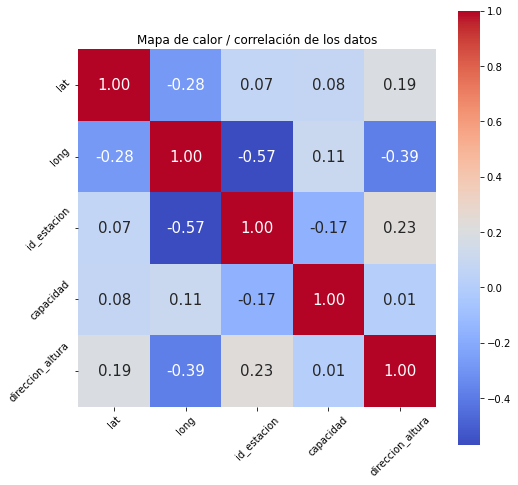

In [144]:
dataCORR=datanuevo.corr()

def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
data.corr(method=histogram_intersection)
plt.figure(figsize=(8,8))
sns.heatmap(dataCORR, cbar = True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title("Mapa de calor / correlación de los datos")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

### El pairplot nos ayuda a ver las correlaciones entre las varibles del dataset.
### Hue lo que hace es, ayudarnos a diferenciar la variable en los datos para mapear aspectos de la trama a diferentes colores.
 * Por ejemplo en este caso, se generan tantos colores como barrios.
 * Además en este tipo de gráficos, nos podemos dar cuenta de algún tipo de inconsistencia en los datos. Por ejemplo, durante el desarrollo del informe, me pasó en la cuadrícula de latitud y longitud que había un dato de latitud que aplastaba el gráfico. Y era porque había una latitud de las "googleadas" que le faltaba el signo negativo. Y eso fue gracias a ver este plot.

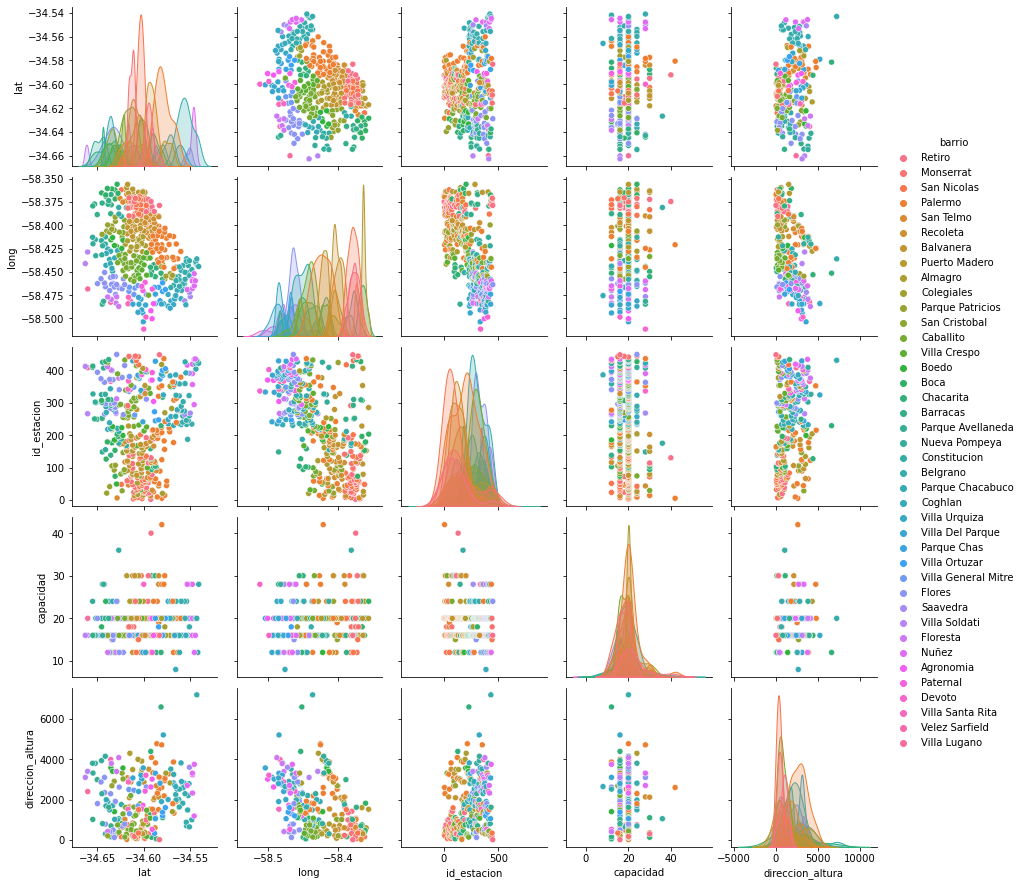

In [146]:
sns.pairplot(datanuevo,hue="barrio")

### Se observa la capacidad de las estaciones en relación a las otras variables

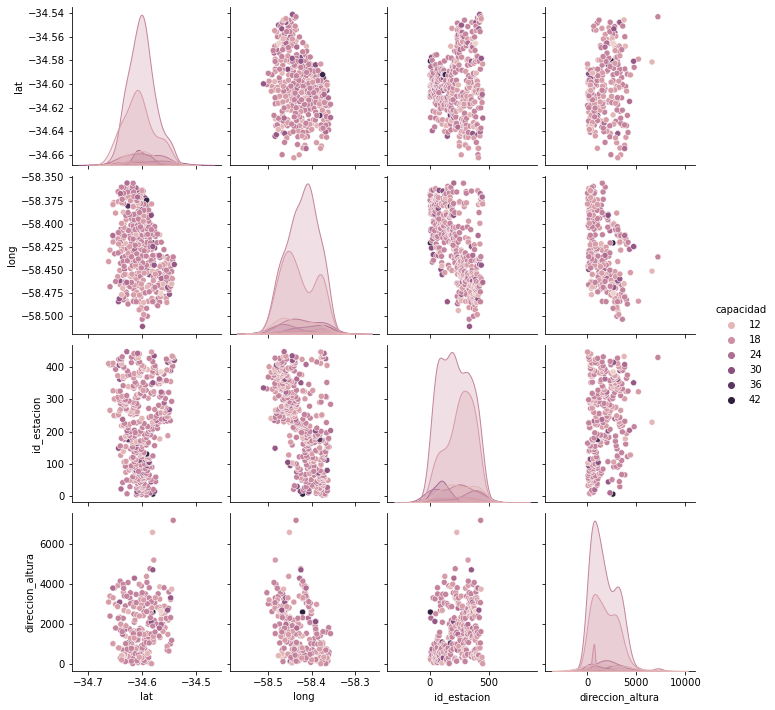

In [147]:
sns.pairplot(datanuevo,hue="capacidad")

### Boxplot
* El siguiente diagrama de cajas se realizó con el fin de ver si había alguna inconsistencia numérica en relación a la capacidad de las estaciones. A raíz de esto, se aprecia que las estaciones de todos los barrios, en términos generales, mantienen los mismos margenes de capacidad, con algunas estaciones que están por fuera de los rangos intercuartiles "permitidos" por la agrupación de barrios.

Text(0.5, 0, 'Capacidad')

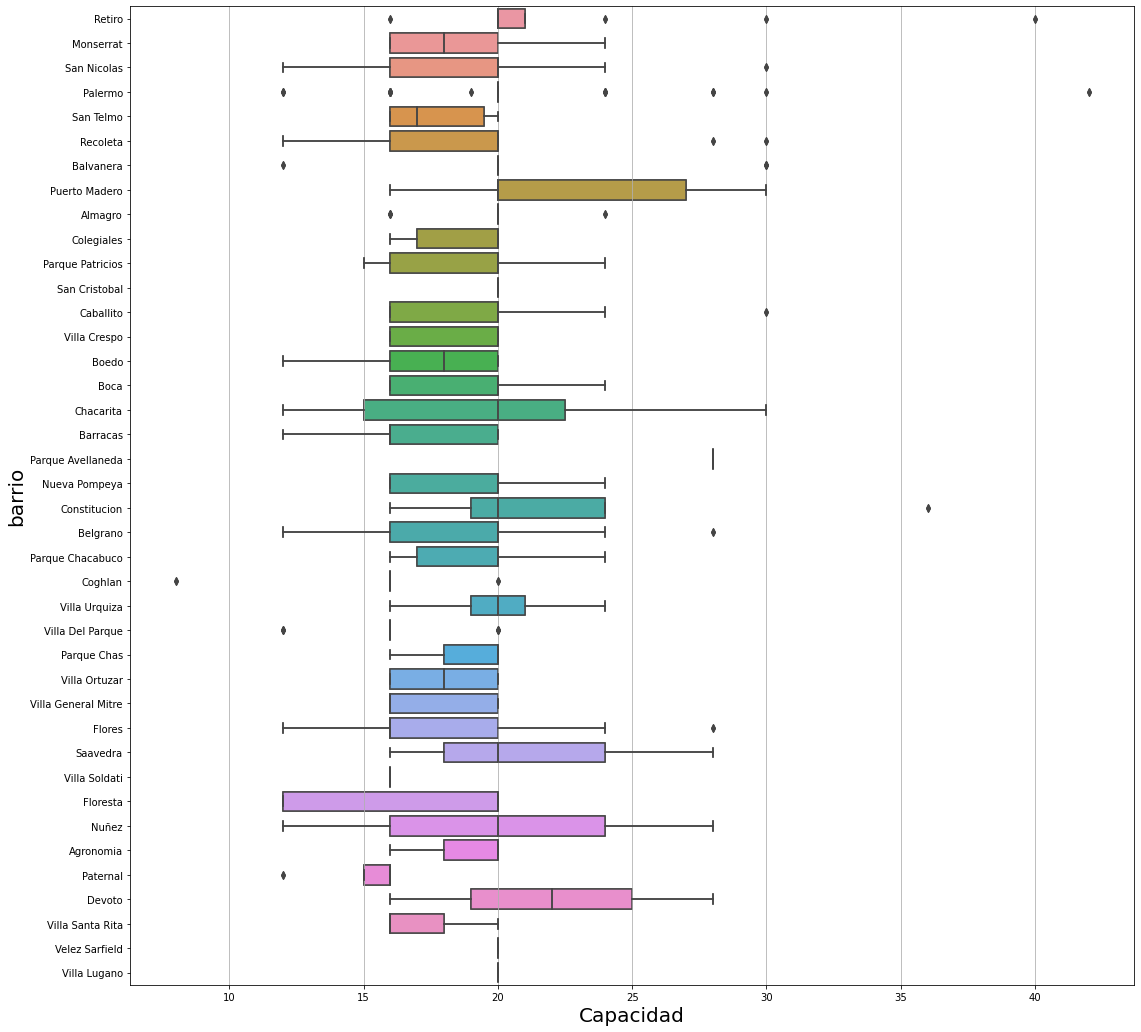

In [150]:
plt.figure(figsize=(18,18))
plt.grid()
sns.boxplot(data = datanuevo, x = "capacidad",y="barrio").set_ylabel("id_estacion",fontsize=20)
sns.boxplot(data = datanuevo, x = "capacidad",y="barrio").set_xlabel("Capacidad",fontsize=20)

### Conclusiones de los datos:
* Muy importante analizar la estructura y "geometría" de los datos que vamos a usar.
* Verificar que los tipos de datos sean válidos en relación a lo que queremos trabajar. 
* Tener en claro cuando usar un valor de tipo entero o flotante y entender como afecta a los datos y visualizaciones.
* Comprobar que no haya nigún tipo de inconsistencia en los datos que pueda perjudicar o dañar nuestras visualizaciones y análisis. Es decir, valores extremos que nos aplasten los gráficos, o que dañen algún tipo de indicador, como ser, promedio de tiempo de viajes. Por ejemplo si hay un valor extremo, el promedio puede verse muy afectado, ya sea por un valor negativo o positivo.

### Conclusiones de los gráficos de Microstrategy:
    * Barchart y mapa geográfico: Con respecto a la "Visualización 1" que agrupa la edad, suma el tiempo de uso y lo divide por género. Se puede apreciar la brecha en el tiempo de uso que hay entre ambos sexos. Esto puede darse por varios motivos. ¿Hay más hombres que usan este medio?, ¿Hay más hombres económicamente activos en el mercado laboral?, ¿Las mujeres hacen menos deporte?, ¿ Cómo está formado el set de datos en relación a la cantidad de hombres y mujeres?. Como respuesta a todos estos interrogantes se decidió realizar un gráfico extra en el que se creó un indicador que cuenta la cantidad de hombres y mujeres presentes en el dataset. Por lo que a la única información que podemos acceder y responder va a ser sólo la cantidad de hombres y mujeres dentro de esta base de datos. Y se evidenció en la hoja "Cuento personas" que hay más hombres registrados en la base de datos usando bicicletas como medio de transporte, por lo que es lógico que la sumatoria total en el tiempo de uso, sea superior la de los hombres.
    * Volviendo a la hoja de Barchart y mapa geográfico: Se visualiza en el mapa "Visualización 2" las coordenadas geográficas con más cantidad de viajes.
    Se agrupó por estación origen (de color azul) y por estación destino (Tropical Jungle). 
    De la estación destino se puede deducir que mientras más cerca del agua hay más cantidad de recorridos. Puede ser por una atracción turística, ya que son datos de Enero y Febrero.
    De la estación origen, la única que nos piden mostrar es la de Plaza Roma, por lo que con un sólo dato, no se pueden desarrollar muchas comparación con el resto. De todas maneras, vemos la similaridad de tamaño con respecto a las estaciones más frecuentadas en el destino. Esto puede significar, que las personas que salen de esa estación, vuelven a esa estación ó a estaciones cercanas.
    
### Bonus Track:
    * Hoja "Nuevo Barchart": Se creó un indicador similar al primero, nada más que en este se le sumó el mes de recorridos. Y se pudo apreciar que Enero es un mes con muchos más recorridos que Febrero. Esto puede deberse a la época turística del año, que notablemente va en descenso de Enero a Febrero. También se realizó un gráfico de tortas al lado de este, con el fin de ver el tiempo de uso de acuerdo al sexo, para ver si este se mantiene con el mismo patrón de tiempo de uso en relación al sexo de los usuarios. Una vez más resulta notorio, el tiempo de uso durante Enero y la brecha de tiempos entre ambos géneros.
    * Hoja tiempos origen destino: Se realizó una tabla que muestra la sumatoria total de tiempos de uso agrupados por el nombre de la estación.
    * Tiempos y recorridos estación destino: En la "Visualización 2" se agrupó por cantidad descendiente de recorridos de acuerdo al nombre de la estación destino. Con este indicador podemos planificar la cantidad de bicicletas que hacen falta, o el mantimiento necesario de acuerdo a un orden de prioridad, o la seguridad que habría que poner en la zona para evitar actos delictivos, entre otros.
    En la "Visualización 1", muestra la sumatoria de tiempo de uso de cada estación de mayor a menor. Con el tiempo de uso, podría planificarse la rotación de bicicletas, o simplemente, serviría para complementar el indicador anterior.
    * En la hoja "Usuarios + Deportistas", se creó una tabla de acuerdo al tiempo de uso agrupado por usuarios, dividido por sexo y se ordenó de mayor a menor con el fin de obtener los usuarios más frecuentes.
    * En la hoja "Mapa de calor" se creó un gráfico que agrupa a las edades de acuerdo al tiempo de uso. Se puede ver que las edades con más tiemp de uso son de los 30 a los 20.
    


# FIN DEL ANÁLISIS EXPLORATORIO DE -ESTACIONES DE BICICLETAS.

## Análisis exploratorio del set de datos de recorridos de bicicletas

In [136]:
data_recorridos.head(3)

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad
0,392691.0,2019-02-22 08:04:40,7.0,Austria y French,200,Riobamba,64.0,FEMENINO,26.0
1,665868.0,2019-02-22 08:01:41,16.0,Lima,149,Facultad de Medicina,33.0,FEMENINO,23.0
2,654559.0,2019-02-22 08:01:38,34.0,Ministerio de Educacion,174,Hospital Francés,146.0,MASCULINO,18.0


### La siguiente celda se ejecuta a raíz de un gráfico hecho en Microstrategy en la hoja "Nuevo Barchart", con el fin de confirmar el rango de meses del dataset. Porque llama la atención que el nombre del dataset sea Recorrido de bicicletas 2015-2019 y que sólo tenga datos de Enero y Febrero del 2019.

In [137]:
print('Rango de fechas de los recorridos:\n')
print('Fecha máxima:',data_recorridos['bici_Fecha_hora_retiro'].max())
print('Fecha mínima:',data_recorridos['bici_Fecha_hora_retiro'].min())

Rango de fechas de los recorridos:

Fecha máxima: 2019-02-22 08:04:40
Fecha mínima: 2019-01-01 00:01:16


In [82]:
data_recorridos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204107 entries, 0 to 204106
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   bici_id_usuario               204107 non-null  float64
 1   bici_Fecha_hora_retiro        204107 non-null  object 
 2   bici_tiempo_uso               203976 non-null  float64
 3   bici_nombre_estacion_origen   204107 non-null  object 
 4   bici_estacion_origen          204107 non-null  int64  
 5   bici_nombre_estacion_destino  203976 non-null  object 
 6   bici_estacion_destino         203976 non-null  float64
 7   bici_sexo                     204107 non-null  object 
 8   bici_edad                     204107 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 14.0+ MB


### No se puede pasar a entero una columna de datos que tiene valores faltantes, entonces a los faltantes los cambio por cero.

In [83]:
## Creo una lista vacia para guardar los indices(osea las filas) que no tienen ningun valor
## es decir que contienen "Nan"
lista=[]
for i, item in enumerate(data_recorridos['bici_estacion_destino']):
    
    try:
        int(item)
    except ValueError:
        lista.append(i)
        #print('ERROR at index {}: {!r}'.format(i, item))
lista

[997,
 1045,
 5108,
 5475,
 6821,
 11089,
 11243,
 11487,
 11512,
 20581,
 20603,
 21146,
 23306,
 24364,
 25956,
 26157,
 27549,
 27550,
 27601,
 27606,
 27784,
 30552,
 30593,
 30703,
 32540,
 32542,
 34604,
 35594,
 36210,
 36215,
 44181,
 44861,
 52517,
 53020,
 59719,
 64106,
 64159,
 68359,
 73713,
 77311,
 77682,
 77832,
 77987,
 81175,
 81578,
 82034,
 85210,
 85657,
 85692,
 86373,
 90156,
 90261,
 90756,
 93069,
 94168,
 95580,
 95581,
 96166,
 98431,
 98847,
 104882,
 107263,
 108504,
 108566,
 108615,
 109248,
 110126,
 114280,
 118029,
 118072,
 118993,
 123775,
 124549,
 124777,
 127042,
 127561,
 128078,
 128079,
 128858,
 132180,
 133041,
 134354,
 137148,
 137376,
 137521,
 137600,
 137925,
 138052,
 138058,
 138136,
 138728,
 140663,
 141698,
 141976,
 144671,
 146012,
 146402,
 146597,
 156842,
 158094,
 159579,
 159602,
 159625,
 163179,
 163308,
 166037,
 166251,
 168989,
 169013,
 169026,
 170604,
 170948,
 173343,
 175858,
 179536,
 180011,
 181264,
 181287,
 181

In [84]:
for i in lista:
    data_recorridos["bici_estacion_destino"][i]=0
for i in lista:
    data_recorridos['bici_tiempo_uso'][i]=0

C:\Users\Alfredo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Alfredo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### En el siguiente bloque de código cambio el tipo de dato de flotante a entero.

In [85]:
### Por el punto (9) de las consignas, voy a pasar el tipo de dato de "estacion destino" a entero,
## porque en Microstrategy, le agrega un cero.
data_recorridos["bici_estacion_destino"] = data_recorridos.bici_estacion_destino.astype(int)

In [86]:
data_recorridos["bici_tiempo_uso"] = data_recorridos.bici_tiempo_uso.astype(int)

### Verificamos que se haya cambiado

In [87]:
data_recorridos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204107 entries, 0 to 204106
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   bici_id_usuario               204107 non-null  float64
 1   bici_Fecha_hora_retiro        204107 non-null  object 
 2   bici_tiempo_uso               204107 non-null  int32  
 3   bici_nombre_estacion_origen   204107 non-null  object 
 4   bici_estacion_origen          204107 non-null  int64  
 5   bici_nombre_estacion_destino  203976 non-null  object 
 6   bici_estacion_destino         204107 non-null  int32  
 7   bici_sexo                     204107 non-null  object 
 8   bici_edad                     204107 non-null  float64
dtypes: float64(2), int32(2), int64(1), object(4)
memory usage: 12.5+ MB


### Guardamos el archivo con las modificaciones

In [88]:
data_recorridos.to_csv(r'C:\Users\Alfredo\Desktop\Microstrategy\Datasets\Recorrido de bicicletas 2015-2019.csv')

In [89]:
data_recorridos.head(3)

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad
0,392691.0,2019-02-22 08:04:40,7,Austria y French,200,Riobamba,64,FEMENINO,26.0
1,665868.0,2019-02-22 08:01:41,16,Lima,149,Facultad de Medicina,33,FEMENINO,23.0
2,654559.0,2019-02-22 08:01:38,34,Ministerio de Educacion,174,Hospital Francés,146,MASCULINO,18.0


### Agrupar valores por tiempo de uso según estación:

In [105]:
data_recorridos.groupby('bici_estacion_destino',axis=0).sum()

,bici_id_usuario,bici_tiempo_uso,bici_estacion_origen,bici_edad
bici_estacion_destino,,,,
0,49940145.0,0,9826,4357.0
1,443674944.0,23123,116455,41333.0
2,124043348.0,5864,27455,13167.0
4,270530668.0,13076,75795,31505.0
5,403231737.0,23273,108494,40187.0
...,...,...,...,...
197,370817714.0,14889,107404,29655.0
199,835182613.0,35344,254601,69095.0
200,689451399.0,30798,213113,65537.0
